<a href="https://colab.research.google.com/github/stutiagarwal3007/water-quality-analysis/blob/main/Water_analysis_Final_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Functions**

In [ ]:
#Necessary functions are imported
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.utils import resample


# **Importing Dataset**

In [ ]:
#Reading Dataset
df = pd.read_csv('w.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#size of datset
df.shape


(3276, 10)

In [ ]:
#checking for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# **Displaying Data Density and Distribution**

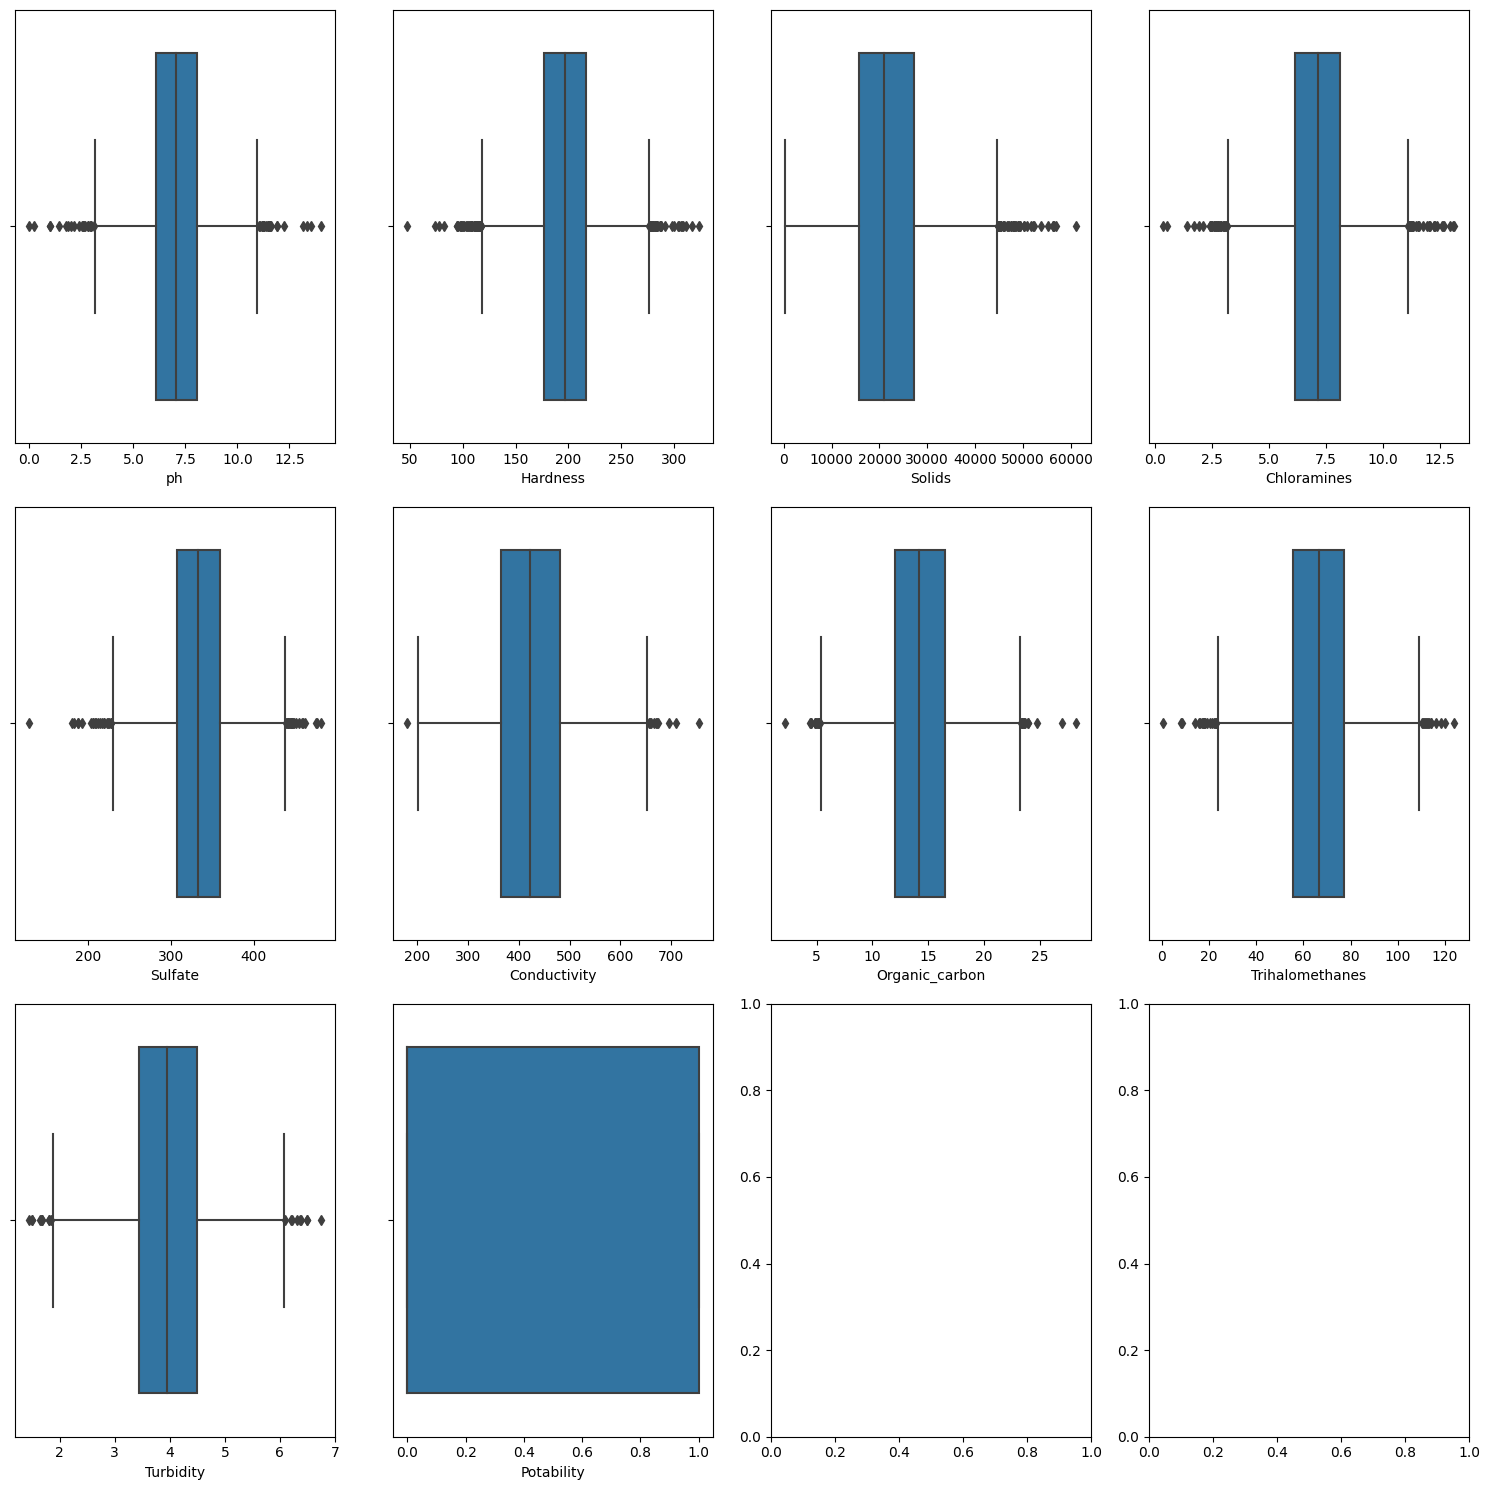

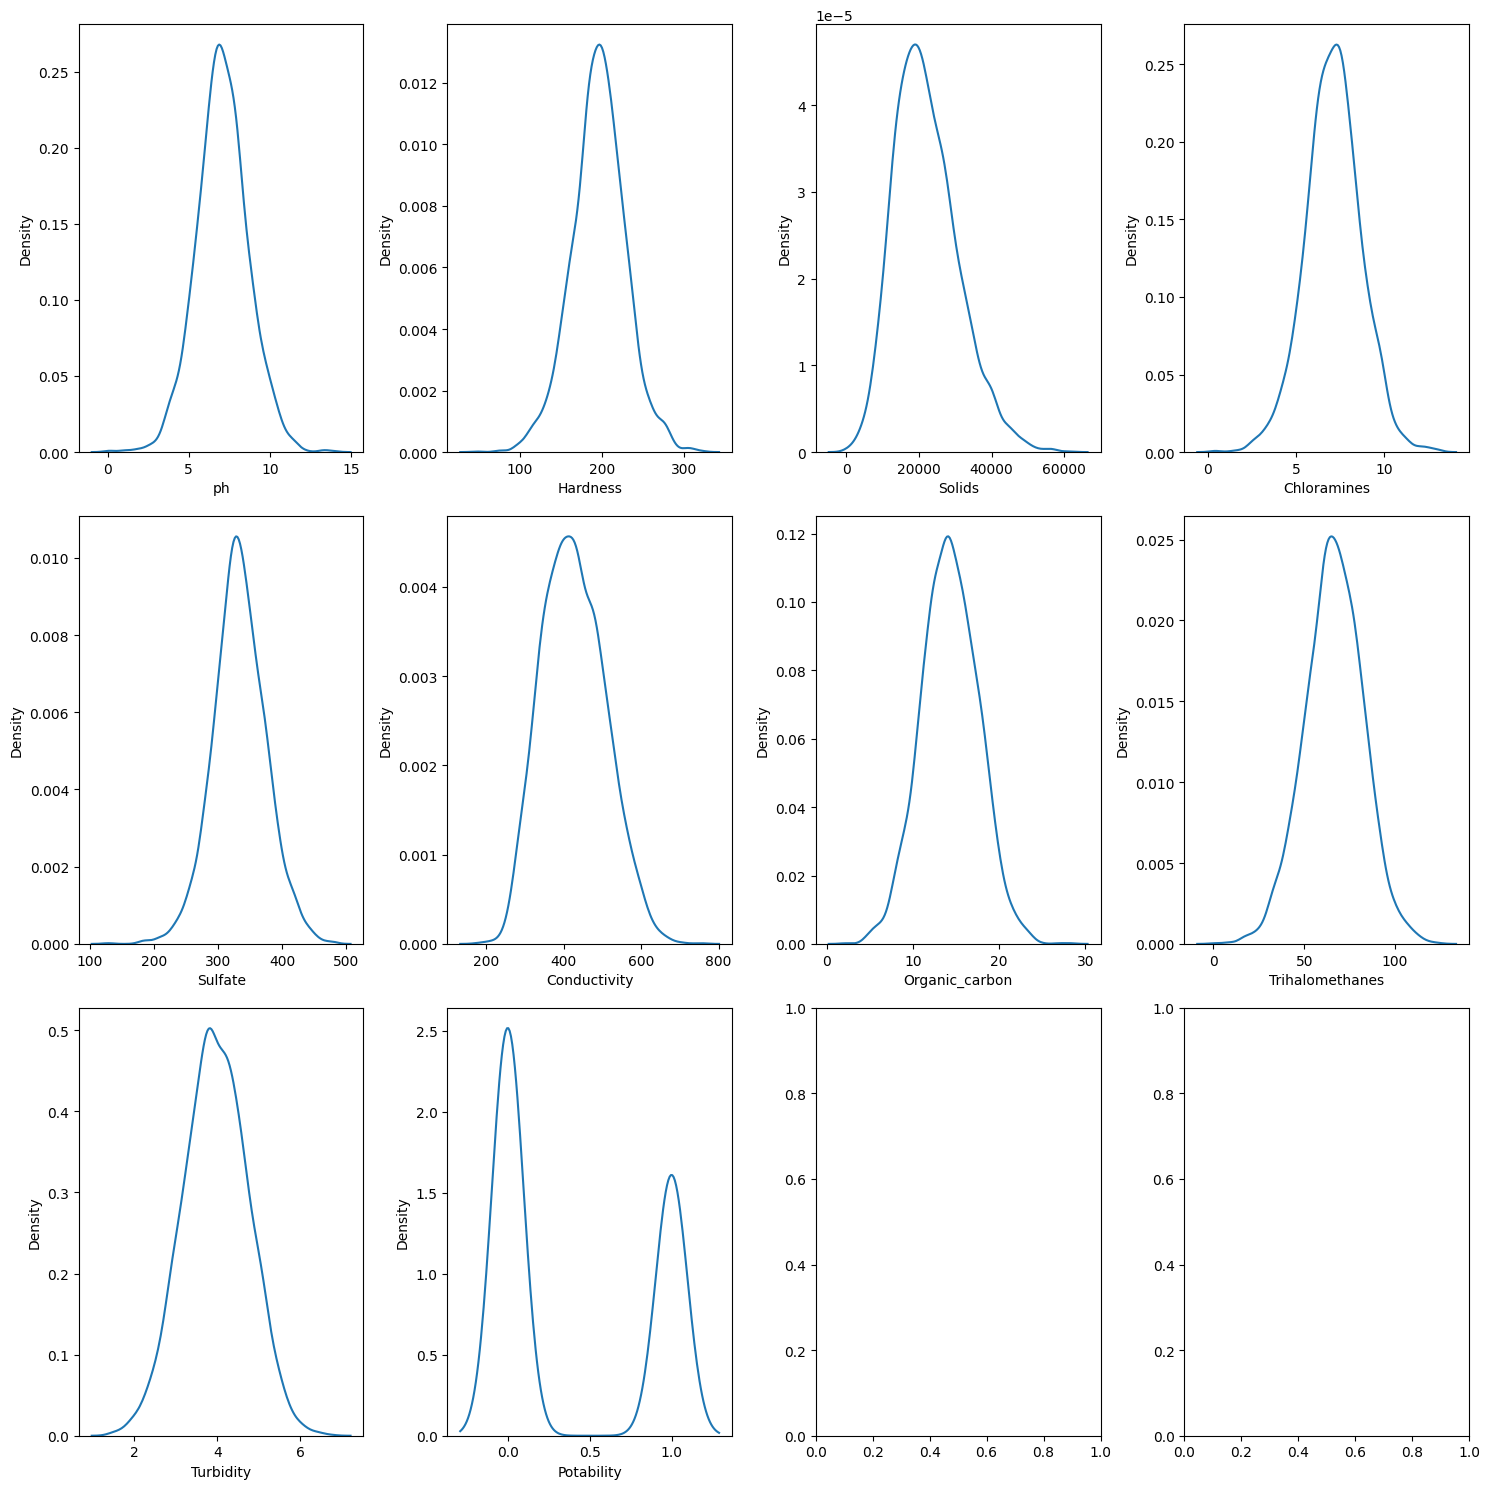

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

# Box plots
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i // 4, i % 4])

plt.tight_layout()

plt.show()

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

for i, col in enumerate(df.columns):
    sns.kdeplot(data=df[col], ax=axes[i // 4, i % 4])

plt.tight_layout()

plt.show()


# **Checking for Correlation**

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        

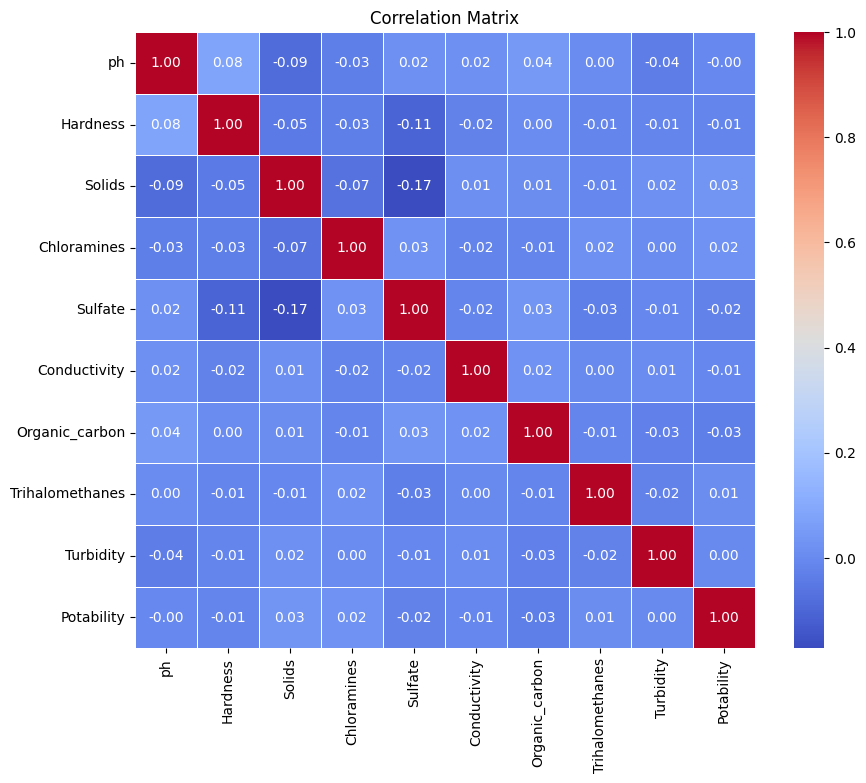

In [ ]:
#Correlation is checked for and plotted
correlation_matrix = df.corr()

print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# **Finding the Type of Missing Values**


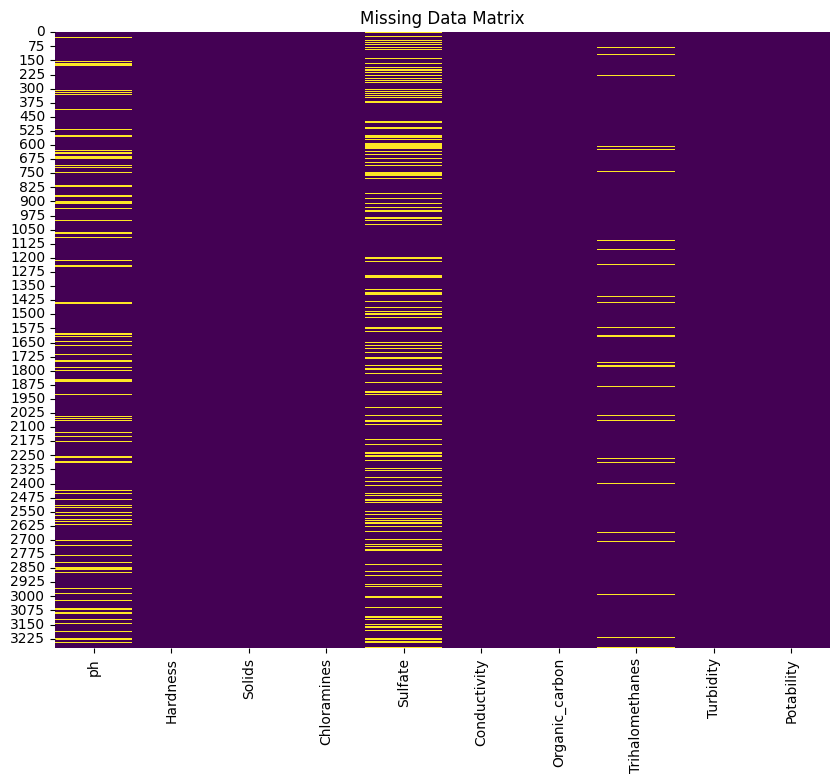

In [ ]:
#Plotting missing value matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Matrix')
plt.show()


In [ ]:
#Some sort of even distribution exists, supports MCAR, so we remove missing values
df.dropna(inplace=True)
print(df)


             ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4    

In [ ]:
#Looking for duplicate values
df.duplicated().sum()

0

In [ ]:
#checking for size after dropping missing values
df.shape

(2011, 10)

In [ ]:
#checking count of potable and non-potable drinking water
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [ ]:
#splitting them into potable and non-potable
df_notpotable  = df[df['Potability']==0]
df_potable = df[df['Potability']==1]

In [ ]:
#Displaying notpotable data
df_notpotable.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [ ]:
#Displaying potable data
df_potable.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1


In [ ]:
#Resampling potable and non potable data to reduce imbalance
df_potable_resample = resample(df_potable, replace=True, n_samples=1200, random_state=0)
df_notpotable_resample = resample(df_notpotable, replace=True, n_samples=1200, random_state=0)


In [ ]:
#size of potable after resampling is checked
df_potable_resample.shape

(1200, 10)

In [ ]:
#now we combine both after eliminating imbalance
df = pd.concat([df_notpotable, df_potable_resample])

In [ ]:
#Shape of Dataset is checked again
df.shape

(2400, 10)

In [ ]:
#When checked for count, now we see both components are balanced
df.Potability.value_counts()

0    1200
1    1200
Name: Potability, dtype: int64

In [ ]:
#Common practice of randomizing data
from sklearn.utils import shuffle
df = shuffle(df, random_state=0)

In [ ]:
#Looking for Outliers

continuous_cols = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]

continuous_data = df[continuous_cols]

def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    irq = q3 - q1
    outliers = column[(column <= q1 - 1.5 * irq) | (column >= q3 + 1.5 * irq)]
    percentage_outliers = len(outliers) / len(df) * 100.0
    return len(outliers), percentage_outliers

outliers_info = continuous_data.apply(detect_outliers)

for column, (num_outliers, perc_outliers) in outliers_info.items():
    print(f"Column {column} outliers = {num_outliers} => {perc_outliers:.2f}%")


Column ph outliers = 34.0 => 1.42%
Column Hardness outliers = 59.0 => 2.46%
Column Solids outliers = 25.0 => 1.04%
Column Chloramines outliers = 53.0 => 2.21%
Column Sulfate outliers = 53.0 => 2.21%
Column Conductivity outliers = 7.0 => 0.29%
Column Organic_carbon outliers = 8.0 => 0.33%
Column Trihalomethanes outliers = 27.0 => 1.12%
Column Turbidity outliers = 16.0 => 0.67%


In [ ]:
#Removing Outliers

def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

df_no_outliers = df.copy()

# Reset the index
df_no_outliers.reset_index(drop=True, inplace=True)

df_no_outliers[continuous_cols] = df_no_outliers[continuous_cols].apply(remove_outliers_iqr, axis=0)

print(df_no_outliers)


            ph    Hardness        Solids  Chloramines     Sulfate  \
0     8.468741  132.456484  21038.442613     8.001378  345.000735   
1     6.624573  172.055471  14877.289737     7.079934  338.441277   
2     9.160998  241.383097  28170.885101     6.819603  262.572042   
3     7.176171  206.294901  25794.950190     7.794727  321.284079   
4     4.443851  240.167901  24070.263651     9.768406  338.052437   
...        ...         ...           ...          ...         ...   
2395  6.153496  163.205548           NaN     7.153803  299.566751   
2396  5.039673  154.418330  23027.549759     7.759843  422.769068   
2397  3.846454  211.757205  14686.283390     7.557873  326.912134   
2398  7.879543  170.190912  37000.955674     6.217223  346.063677   
2399  4.668102  193.681735           NaN     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       360.575586       10.742960        64.508934   2.876996           1  
1       405.81809

# **Splitting the dataset into the Training set and Test set**



In [ ]:
from sklearn.model_selection import train_test_split
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Performing Randomized Search for Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import accuracy_score

# Define a smaller search space
param_dist = {
    'n_estimators': randint(50, 150),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'random_state': randint(1, 100)
}

rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Reduce the number of iterations
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=30, cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train.ravel())

print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 90, 'n_estimators': 132, 'random_state': 87}
Accuracy: 0.8667


# **Final Accuracy**

In [ ]:
#Estimated parameters with the help of Randomized Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

rf_classifier = RandomForestClassifier(
    n_estimators=180,
    criterion='gini',
    max_depth=40,
    random_state=1
)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)


Accuracy: 0.8708

Confusion Matrix:
[[111  11]
 [ 20  98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       122
           1       0.90      0.83      0.86       118

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.87      0.87       240



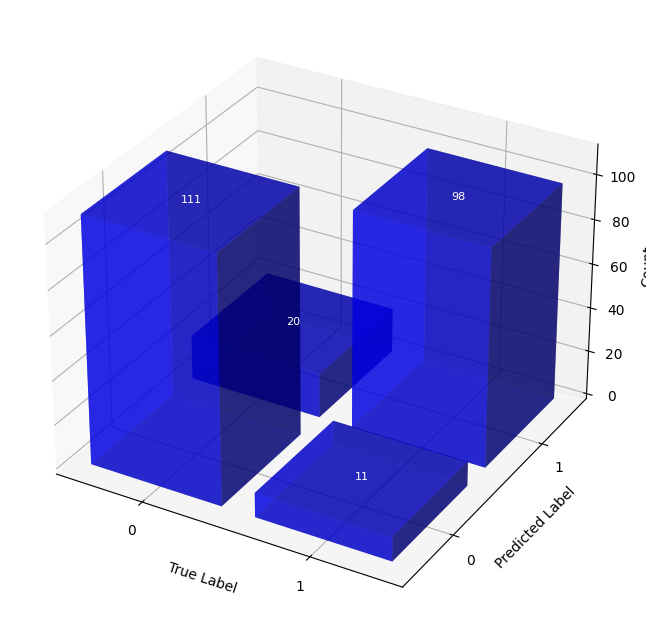

In [ ]:
#Visualization of Confusion Matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting the matrix dimensions
xpos, ypos = np.meshgrid(range(conf_matrix.shape[0]), range(conf_matrix.shape[1]))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Flatten the matrix values
dx = dy = 0.8
dz = conf_matrix.flatten()

# Plotting the bars
bars = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', alpha=0.6)

for xi, yi, zi in zip(xpos, ypos, dz):
    ax.text(xi + 0.4, yi + 0.4, zi, str(int(zi)), ha='center', va='center', color='white', fontsize=8)

ax.set_xticks(np.arange(conf_matrix.shape[0]) + 0.4)
ax.set_yticks(np.arange(conf_matrix.shape[1]) + 0.4)
ax.set_xticklabels(np.arange(conf_matrix.shape[0]))
ax.set_yticklabels(np.arange(conf_matrix.shape[1]))
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.set_zlabel('Count')

plt.show()
